## Introduction
This exercise explores polynomial regression, a form of regression analysis where the relationship between the independent variable \( X \) and the dependent variable \( y \) is modeled as an \( n \)th degree polynomial. We will create a synthetic dataset, train models with varying degrees of polynomials, and evaluate their performance on different test sets.

## Task
We want to use polynomial regression to model the relationship between the independent variable \( X \) and the dependent variable \( y \).

## Dataset
We will create a synthetic dataset using the given equation. We will use this dataset to train polynomial regression models with varying degrees of polynomials. 
We will also create different test sets to evaluate the models' performance.

## Objective
We want to find the degree of the polynomial that best fits the relationship between the independent variable \( X \) and the dependent variable \( y \). We will use the mean squared error (MSE) to evaluate the models' performance on different test sets.

## Plan
1. Create a synthetic dataset using the given equation.
2. Split the dataset into training and testing sets.
3. Train polynomial regression models with varying degrees of polynomials.
4. Evaluate the models' performance on different test sets using the mean squared error (MSE).
5. Find the degree of the polynomial that best fits the relationship between the independent variable \( X \) and the dependent variable \( y \).



# Implementation (100 Points)
We will start by creating a synthetic dataset using the given equation.

## 1. Create a synthetic dataset (20 Points)
First, define a function to generate a dataset with 1000 samples in the range of **-4 to -1** from a polynomial with added noise. Assume that the noise is from a normal distribution and has a mean of 0 and std of 5. 

The relationship between the independent variable \( X \) and the dependent variable \( y \) is given by the following equation:

\[ y = 0.1X^5 + X^4 - 2X^3 + 7X^2 - 9X + 3 \]

Generate the independent variable \( X \) using the `numpy` library and then calculate the dependent variable \( y \) using the given equation.

In [18]:
import numpy as np

def generate_dataset(range_start, range_end, num_samples, noise_std=5.0):

    X = np.random.uniform(range_start, range_end, num_samples)
    y = 0.1 * X**5 + X**4 - 2 * X**3 + 7 * X**2 - 9 * X + 3
    noise = np.random.normal(0, noise_std, num_samples)
    y += noise
    return X, y

In [19]:
X, y = generate_dataset(-4, -1, 1000)

## 2. Splitting the Dataset (5 Points)
Split the dataset into training and two test sets with the same length, ensuring one test set is in the range of the training data and the other is in the **range of 5 to 7.**

In [20]:
from sklearn.model_selection import train_test_split

degree = 7

X_train, X_test_in_range, y_train, y_test_in_range = train_test_split(X, y, test_size=0.5, random_state=42)

X_test_out_of_range, y_test_out_of_range = generate_dataset(5, 7, len(X_test_in_range))

## 3. Polynomial Regression Training (30 Points)
Train polynomial regression models of varying degrees from degree = 2 to degree = 7. You can use the `preprocessing`, `linear_model`, and `pipeline` classes of the `sklearn` library.

In [21]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.pipeline import make_pipeline

def train_polynomial_regression(X, y, degree):
    model = make_pipeline(PolynomialFeatures(degree), LinearRegression())
    model.fit(X.reshape(-1, 1), y)
    return model

In [22]:
models = {}
for d in range(2, degree + 1):
    models[d] = train_polynomial_regression(X_train, y_train, degree=d)

## 4. Model Evaluation (15 Points)
Evaluate the models on both test sets using MSE. You can use the `mean_squared_error` from `sklearn.metrics`.


In [23]:
from sklearn.metrics import mean_squared_error

def evaluate_models(models, X_test, y_test):
    losses = {}
    for degree, model in models.items():
        y_pred = model.predict(X_test.reshape(-1, 1))
        mse = mean_squared_error(y_test, y_pred)
        losses[degree] = mse
    return losses

In [24]:
losses_train = evaluate_models(models, X_train, y_train)
losses_in_range = evaluate_models(models, X_test_in_range, y_test_in_range)
losses_out_of_range = evaluate_models(models, X_test_out_of_range, y_test_out_of_range)

## 5. Plotting Model Scores (20 Points)

Now to evaluate the performance of the polynomial regression models, plot the **logarithm** of losses of the training and two test sets based on the model degree varying from 3 to 7. Train the model a few times to get a sense of how the results can change. 


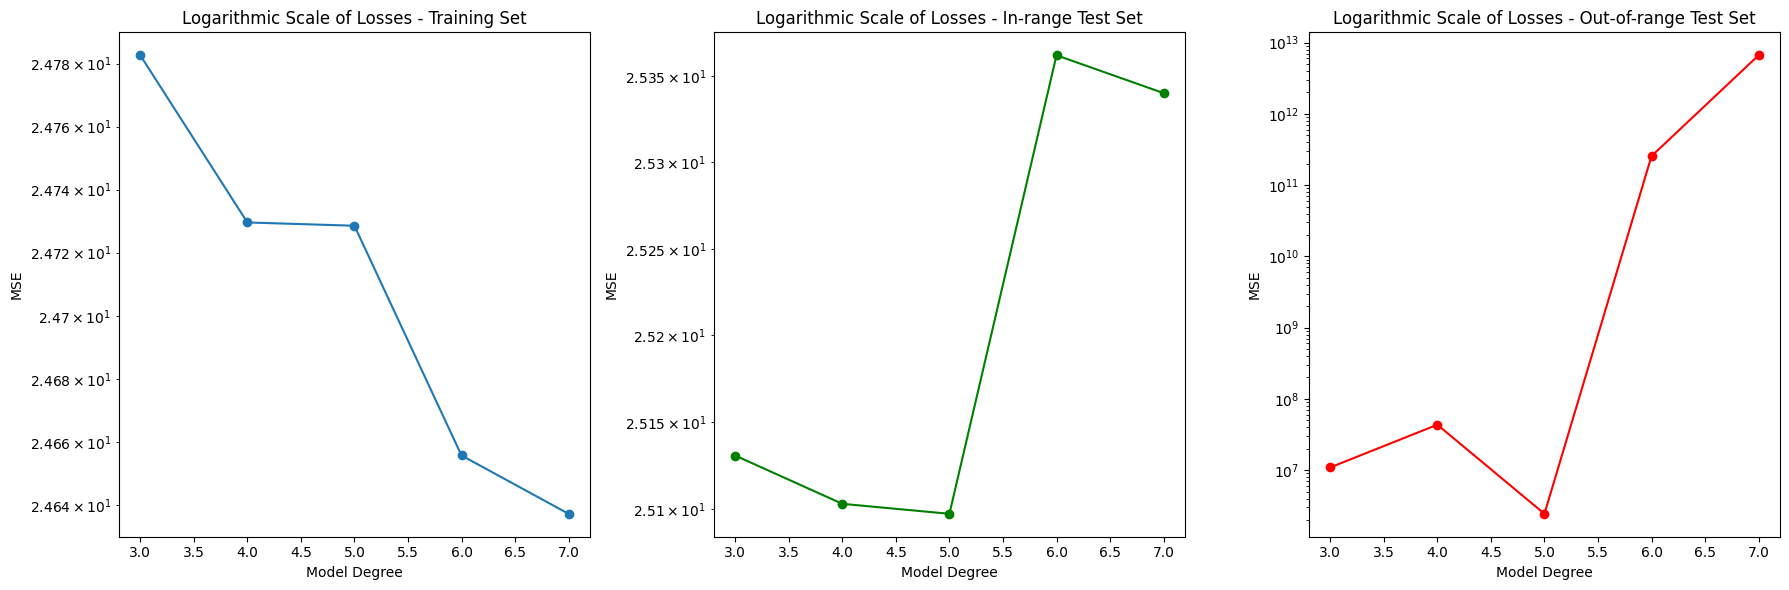

In [25]:
from matplotlib import pyplot as plt

# Delete the '2' key from the dictionaries
del losses_train[2]
del losses_in_range[2]
del losses_out_of_range[2]

# Plot the losses in logarithmic scale
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 6))

# Plot logarithmic scale of losses of training set
ax1.plot(range(3, 8), list(losses_train.values()), marker='o')
ax1.set_title('Logarithmic Scale of Losses - Training Set')
ax1.set_xlabel('Model Degree')
ax1.set_ylabel('MSE')
ax1.set_yscale('log')

# Plot logarithmic scale of losses of in-range test set
ax2.plot(range(3, 8), list(losses_in_range.values()), marker='o', color='green')
ax2.set_title('Logarithmic Scale of Losses - In-range Test Set')
ax2.set_xlabel('Model Degree')
ax2.set_ylabel('MSE')
ax2.set_yscale('log')

# Plot logarithmic scale of losses of out-of-range test set
ax3.plot(range(3, 8), list(losses_out_of_range.values()), marker='o', color='red')
ax3.set_title('Logarithmic Scale of Losses - Out-of-range Test Set')
ax3.set_xlabel('Model Degree')
ax3.set_ylabel('MSE')
ax3.set_yscale('log')

plt.tight_layout()
plt.show()

## Conclusion (10 Points)

Now print out the losses on each set here. 

In [26]:
print("Losses on Training Set:")
for degree, loss in losses_train.items():
    print(f"Degree {degree}: {loss}")

print("\nLosses on In-range Test Set:")
for degree, loss in losses_in_range.items():
    print(f"Degree {degree}: {loss}")

print("\nLosses on Out-of-range Test Set:")
for degree, loss in losses_out_of_range.items():
    print(f"Degree {degree}: {loss}")

Losses on Training Set:
Degree 3: 24.782680941930376
Degree 4: 24.729590926307043
Degree 5: 24.728550806381456
Degree 6: 24.655793442436206
Degree 7: 24.637349523355827

Losses on In-range Test Set:
Degree 3: 25.130675945494005
Degree 4: 25.10292180977745
Degree 5: 25.09719896478483
Degree 6: 25.36215380731071
Degree 7: 25.340184241459394

Losses on Out-of-range Test Set:
Degree 3: 10930842.524997124
Degree 4: 43413308.82306273
Degree 5: 2440352.0188975264
Degree 6: 255651825498.76126
Degree 7: 6659221766476.483


With comparing the loss of **training set and the in-range test set** and also **in-range test set and the out-of-range test set**, specially in higher degrees, what we can conclude about the bias - variance trade off?

**Answer:**

1- For this we can see that at first the model is to simple to learn our 5th degree function and when we make it more complicated, the train loss keeps decreasing because the model has more parameters and can learn the training data better and the test error decreases until 5 and then it starts increasing because now the model is more complex than our function and it overfits. So the variance is going higher and the bias-variance trade-of is clear here. </br>
2- We can see that the error for the out of range dataset is extremely high and even the least error there is still better than the highest error for the in range dataset. This is because our model has not seen data from that region and is completely bias to that data. So it's performance is extremely poor. Even there it performs better with 5th degree which shows that the general structure is helping, but it is not enough.